In [ ]:
# Initialization
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sqrt,floor


In [ ]:
# Function for generating an oracle
def Oracle(qc):
    # Place states in super position by adding Hadamard gates to each query qubit
    for i in range(4):
        qc.h(i)
    # Place auxillary qubit 4 in |-> state
    qc.x(4)
    qc.h(4)
    qc.barrier()

    # Invert the phase of state |1001>
    qc.x(1)
    qc.x(2)
    qc.mcx([0,1,2,3],4)
    qc.x(1)
    qc.x(2)
    qc.barrier()
    # Invert the phase of state |0110>
    qc.x(0)
    qc.x(3)
    qc.mcx([0,1,2,3],4)
    qc.x(0)
    qc.x(3)
    qc.barrier()
    
    return qc




In [ ]:
# Build Diffuser
def Diffuser(qc):
    # Add Hadamard gate to each query qubit
    for i in range(4):
        qc.h(i)

    # Add X gate to each query qubit
    for i in range(4):
        qc.x(i)

    # Add a multiple controlled X gate with the query qubits as control and the auxillary qubit as the target
    qc.mcx([0,1,2,3],4)

    # Add X gate to each query qubit
    for i in range(4):
        qc.x(i)

    # Add Hadamard gate to each query qubit
    for i in range(4):
        qc.h(i)
    qc.barrier()
    return qc




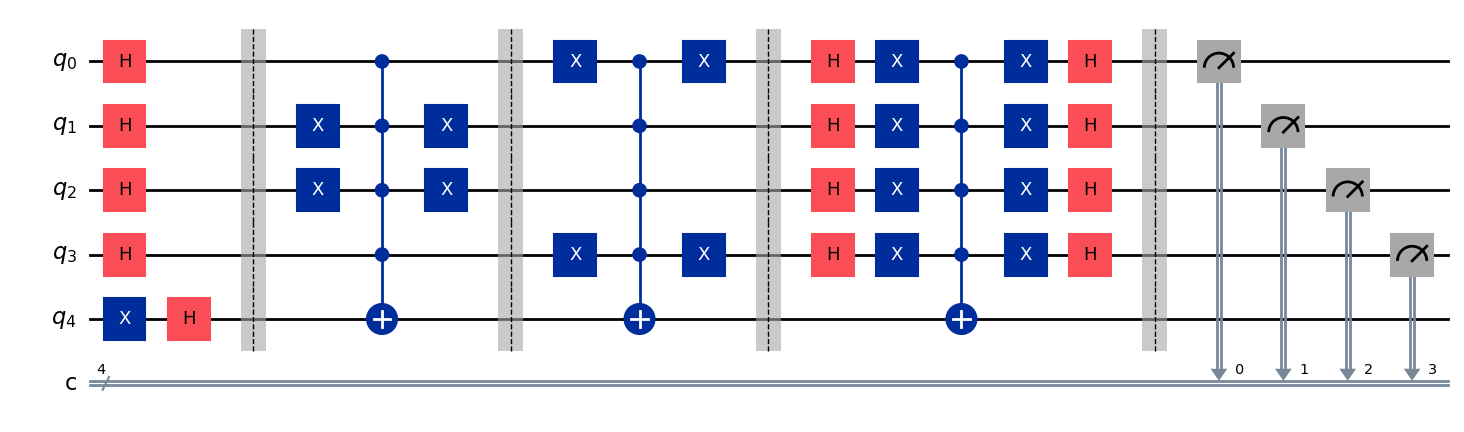

In [ ]:
# create the circuit using the functions above
qc = QuantumCircuit(5,4)
qc = Oracle(qc)
qc = Diffuser(qc)

# Measure each query qubit
for i in range(4):
    qc.measure(i,i)
# Display the circuit
display(qc.draw(output ="mpl"))

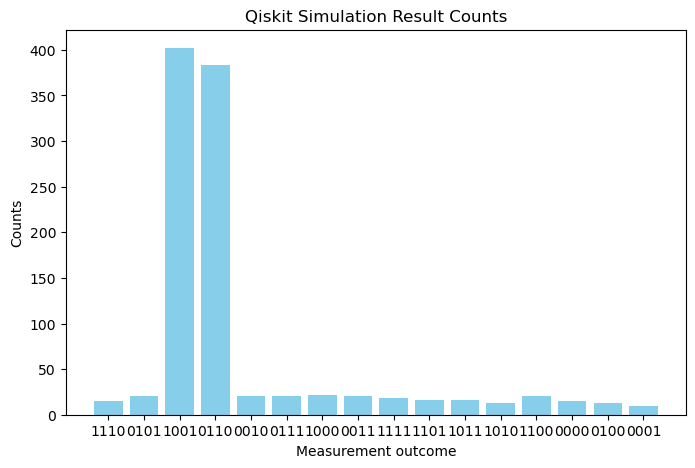

In [ ]:
from qiskit_aer import Aer
import qiskit.transpiler

# Create a Quantum Simulator to simulate the circuit 1024 times
backend = Aer.get_backend('qasm_simulator')

t_circuit = transpile(qc, simulator)
job = backend.run(t_circuit, shots=1024)

results = job.result()
counts = result.get_counts()

# Plot a histogram of the results
plt.figure(figsize=(8,5))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xlabel('Measurement outcome')
plt.ylabel('Counts')
plt.title('Qiskit Simulation Result Counts')
plt.show()
